In [43]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
from scipy.optimize import curve_fit
import glob
import os
import sys
import matplotlib.backends.backend_pdf
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import linalg
import pprint
import re
plt.rc('font', family='serif')
from matplotlib import rc
import pandas as pd
from astropy import constants as const
from astropy import units as units
from IPython.display import Markdown as md
import sympy
import pandas
from sympy import integrate, diff, sqrt, cos, sin, pi, exp, log
from sympy.abc import * 
i = sqrt(-1)
import numpy as np
import sympy.printing as printing
latp = printing.latex
hbar = sympy.symbols("hbar", real=True)
import mpmath 
import plotly.express as px
import plotly.graph_objs as go
hbar

hbar

Where $B$ is the spectral radiance and $f$ is the frequency, we have Planck's law of Blackbody Radiation. We will be using CGS units.

In [44]:
lam = sympy.symbols("lambda")
def B(T, l, number = False, dps=50):
    if number:
        mpmath.mp.dps = dps
        k_B = const.k_B.value
        h = const.h.value
        c = const.c.value
        T = mpmath.mpmathify(T)
        return 2*h* c**2  / (l**5 * 
                (mpmath.exp(h * c/ (l * k_B * T)) - 1))
    else:
        k_B, h, c = sympy.symbols("k_B h c")
        return 2*h* c**2  / (l**5 * 
                (exp(h * c/ (l * k_B * T)) - 1))
md("We have the Planck Blackbody Law" + "\\begin{equation} B_l = " + latp(B(T,lam))
   + "\\end{equation}")

We have the Planck Blackbody Law\begin{equation} B_l = \frac{2 c^{2} h}{\lambda^{5} \left(e^{\frac{c h}{T k_{B} \lambda}} - 1\right)}\end{equation}

In [45]:
from sympy.plotting import plot
def plot_planck(T):
    wavelengths = np.linspace(350 * 10**-9, 1600 * 10**-9, 10**4)
    radiances = [float(B(T, l, True)) for l in wavelengths]
    yname =  "Spectral Radiance (W m^7)"
    df = pandas.DataFrame([wavelengths, radiances]).transpose()
    df.columns = ["Wavelength (m)", yname]
    fig = px.scatter(df, x="Wavelength (m)", y = yname, 
                      title = "Planck Function for " + str(T) + " Kelvin Ideal Blackbody")
    fig.write_html(str(T) + "blackbody_plot.html")
    plt.figure(dpi = 800)
    plt.scatter(wavelengths, radiances)
    plt.xlabel("Wavelength (m)")
    plt.grid(which='minor', axis='both', visible=True)
    plt.grid(which='major', axis='both', visible=True)
    plt.ylabel("Spectral Radiance (W m$^{7}$)") 
    plt.title(str(T) + " Kelvin Ideal Blackbody")
    return plt
    '''
    plot(b_fun, xlim = (350 * 10**-9, 1600 * 10**-9), ylim=(.9,10),
        adaptive = False, nb_of_points = 10**8, yscale="log", xlabel = "Wavelength (nm)",
        title = "Planck Function for Blackbody at " + str(T) + " Kelvin",
        ylabel = "Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)")
    '''

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

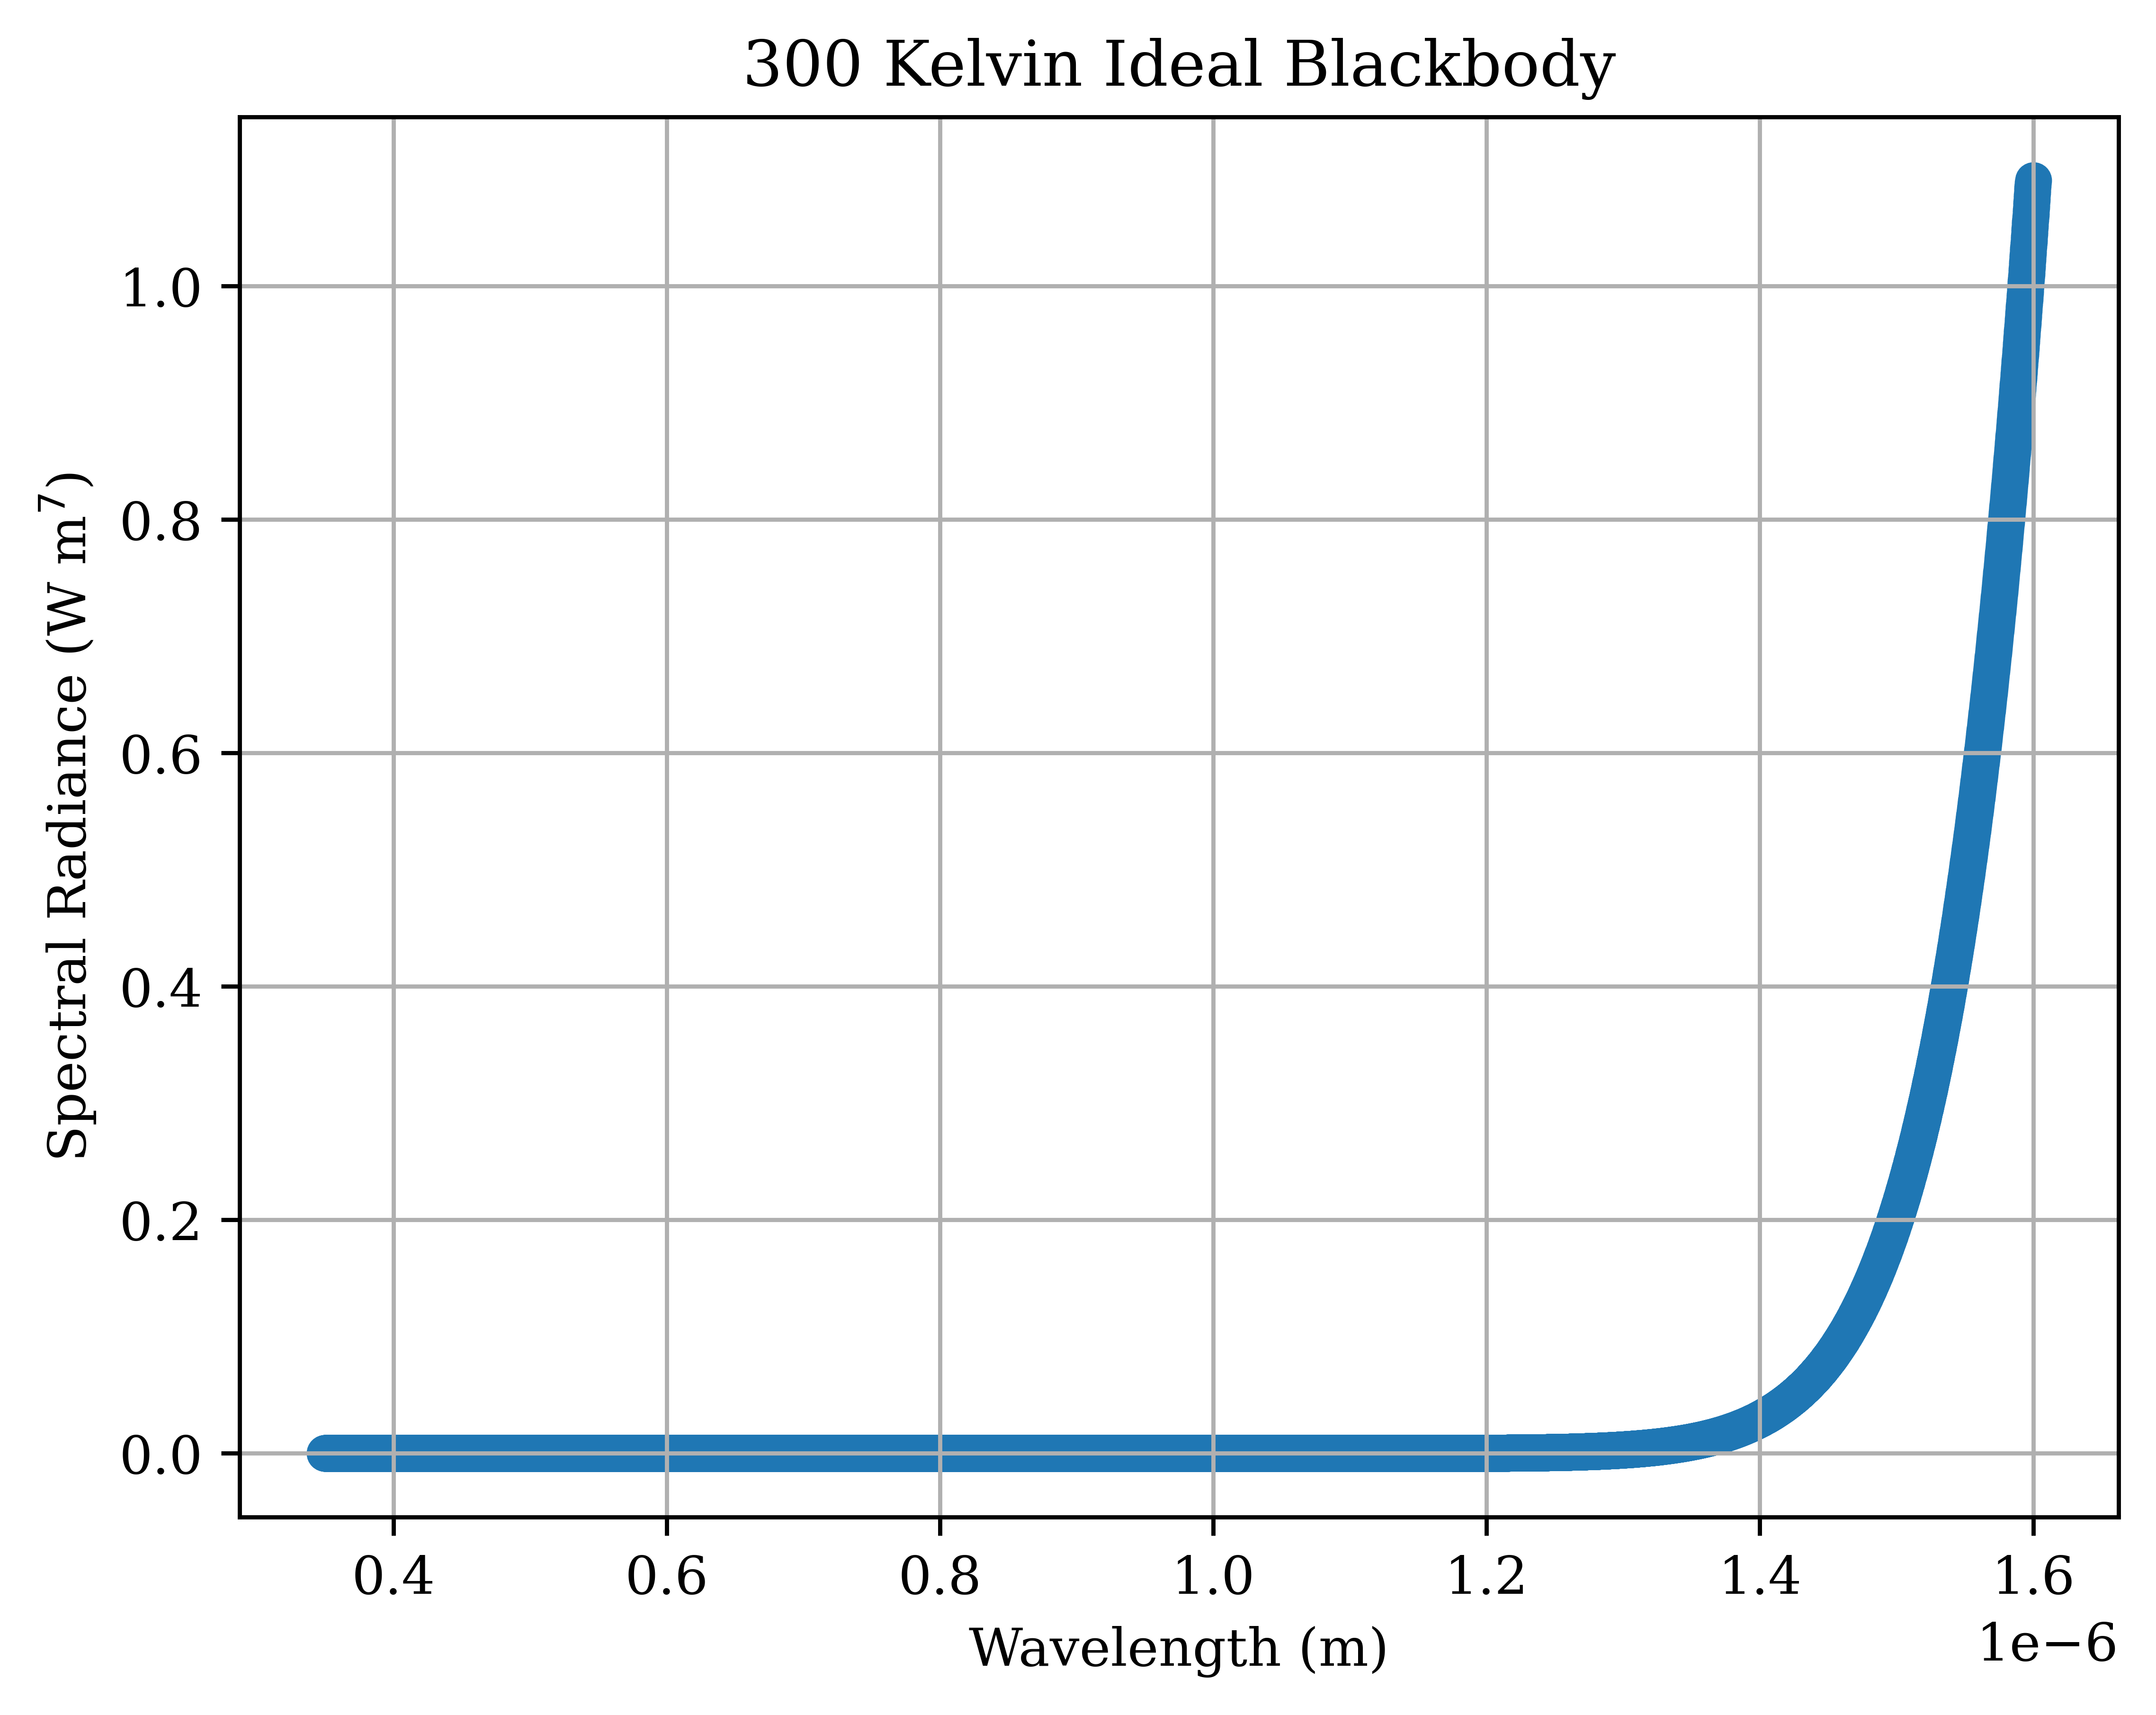

In [46]:
plot_planck(300)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

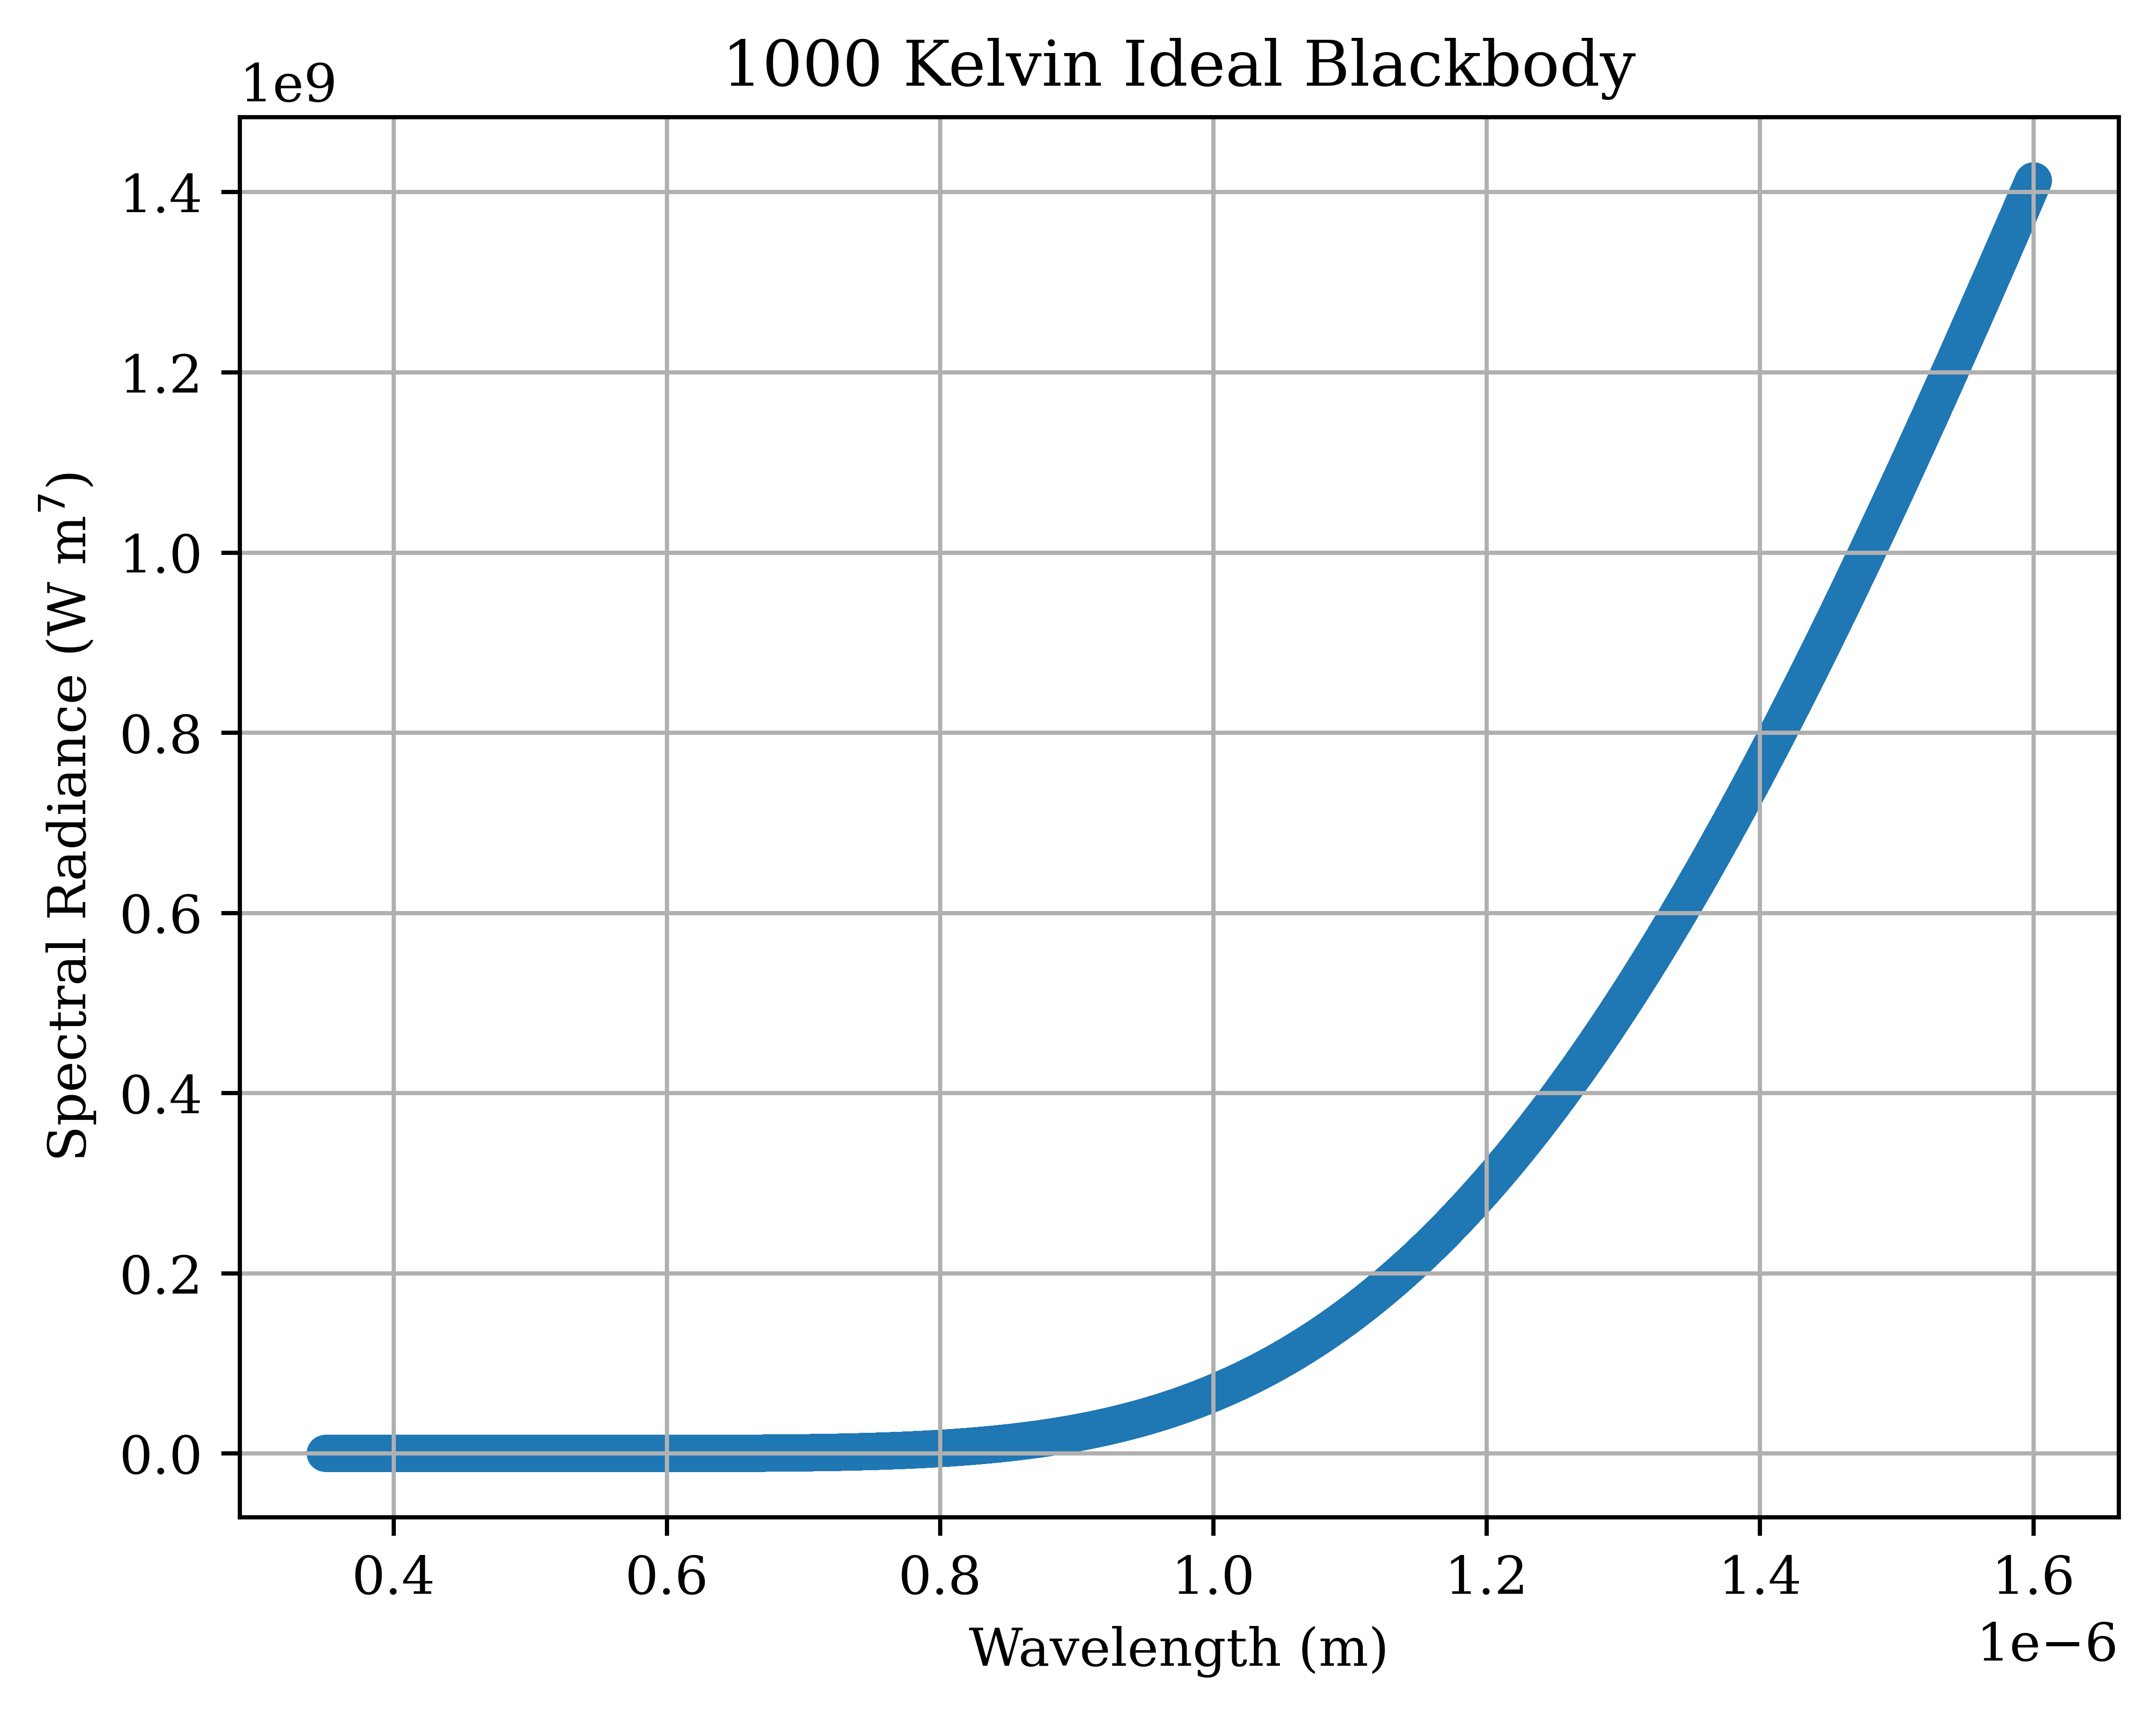

In [47]:
plot_planck(1000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

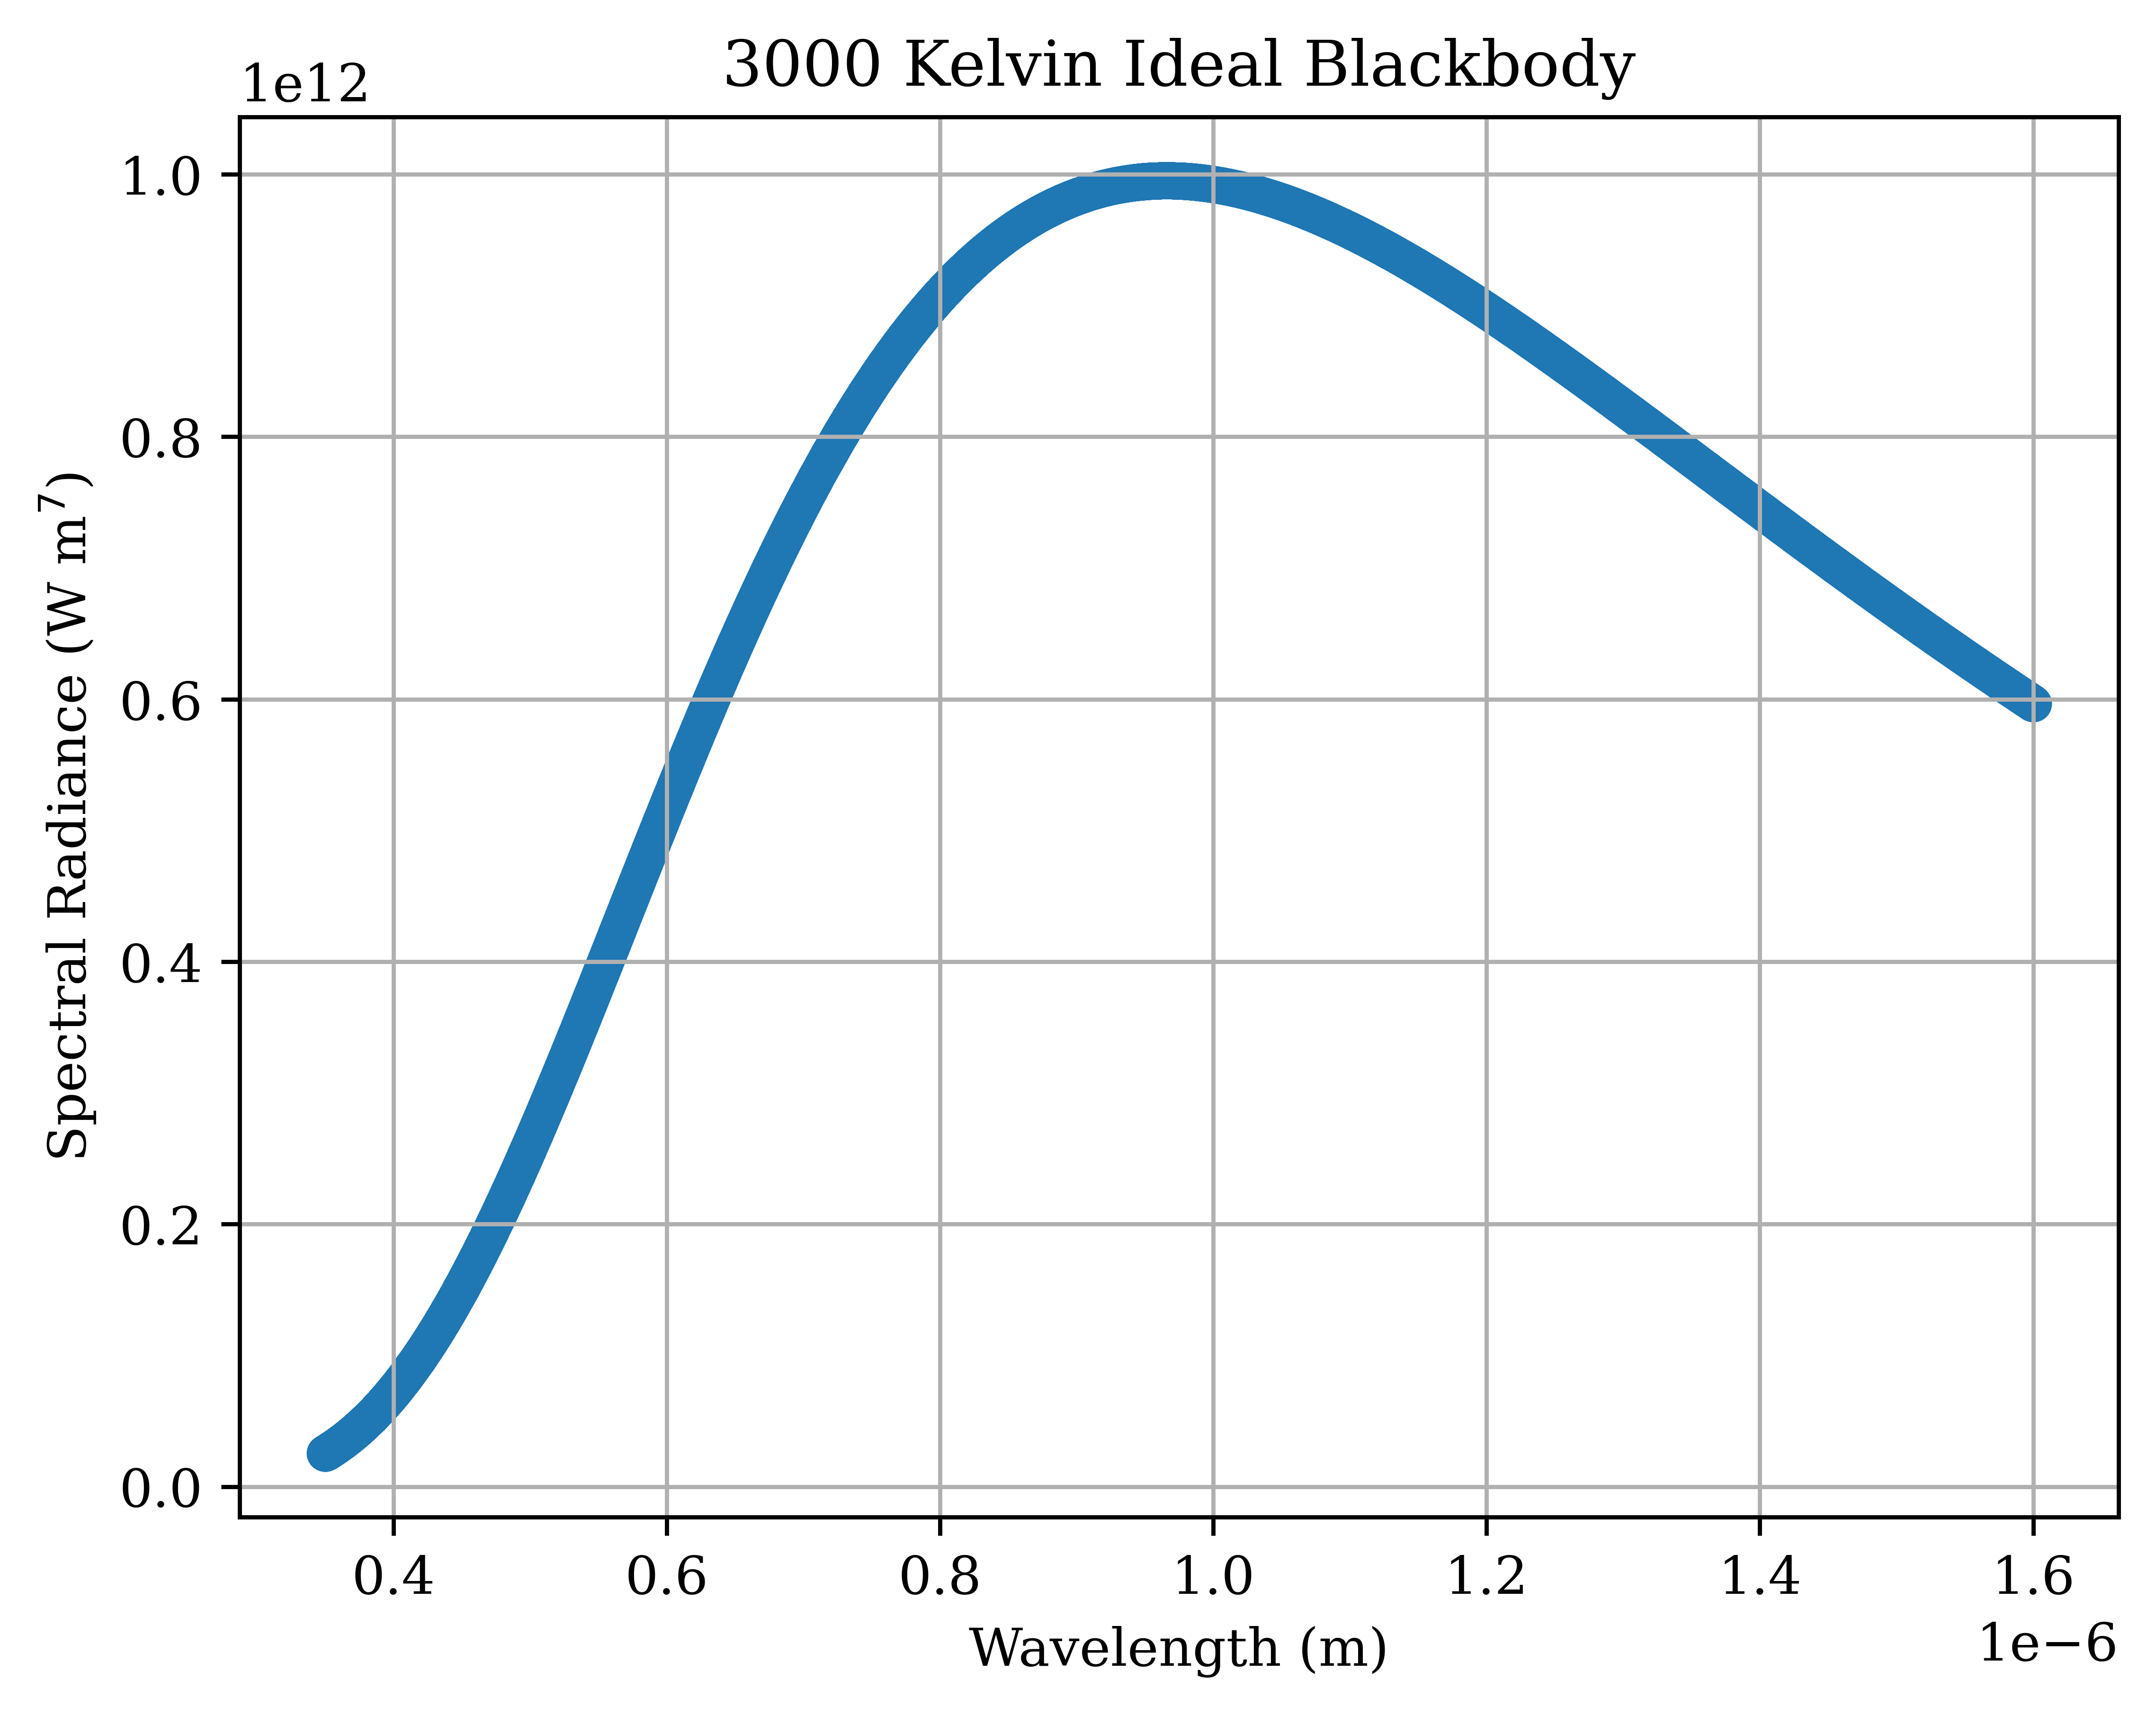

In [48]:
plot_planck(3000)

<module 'matplotlib.pyplot' from 'C:\\Users\\marco\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

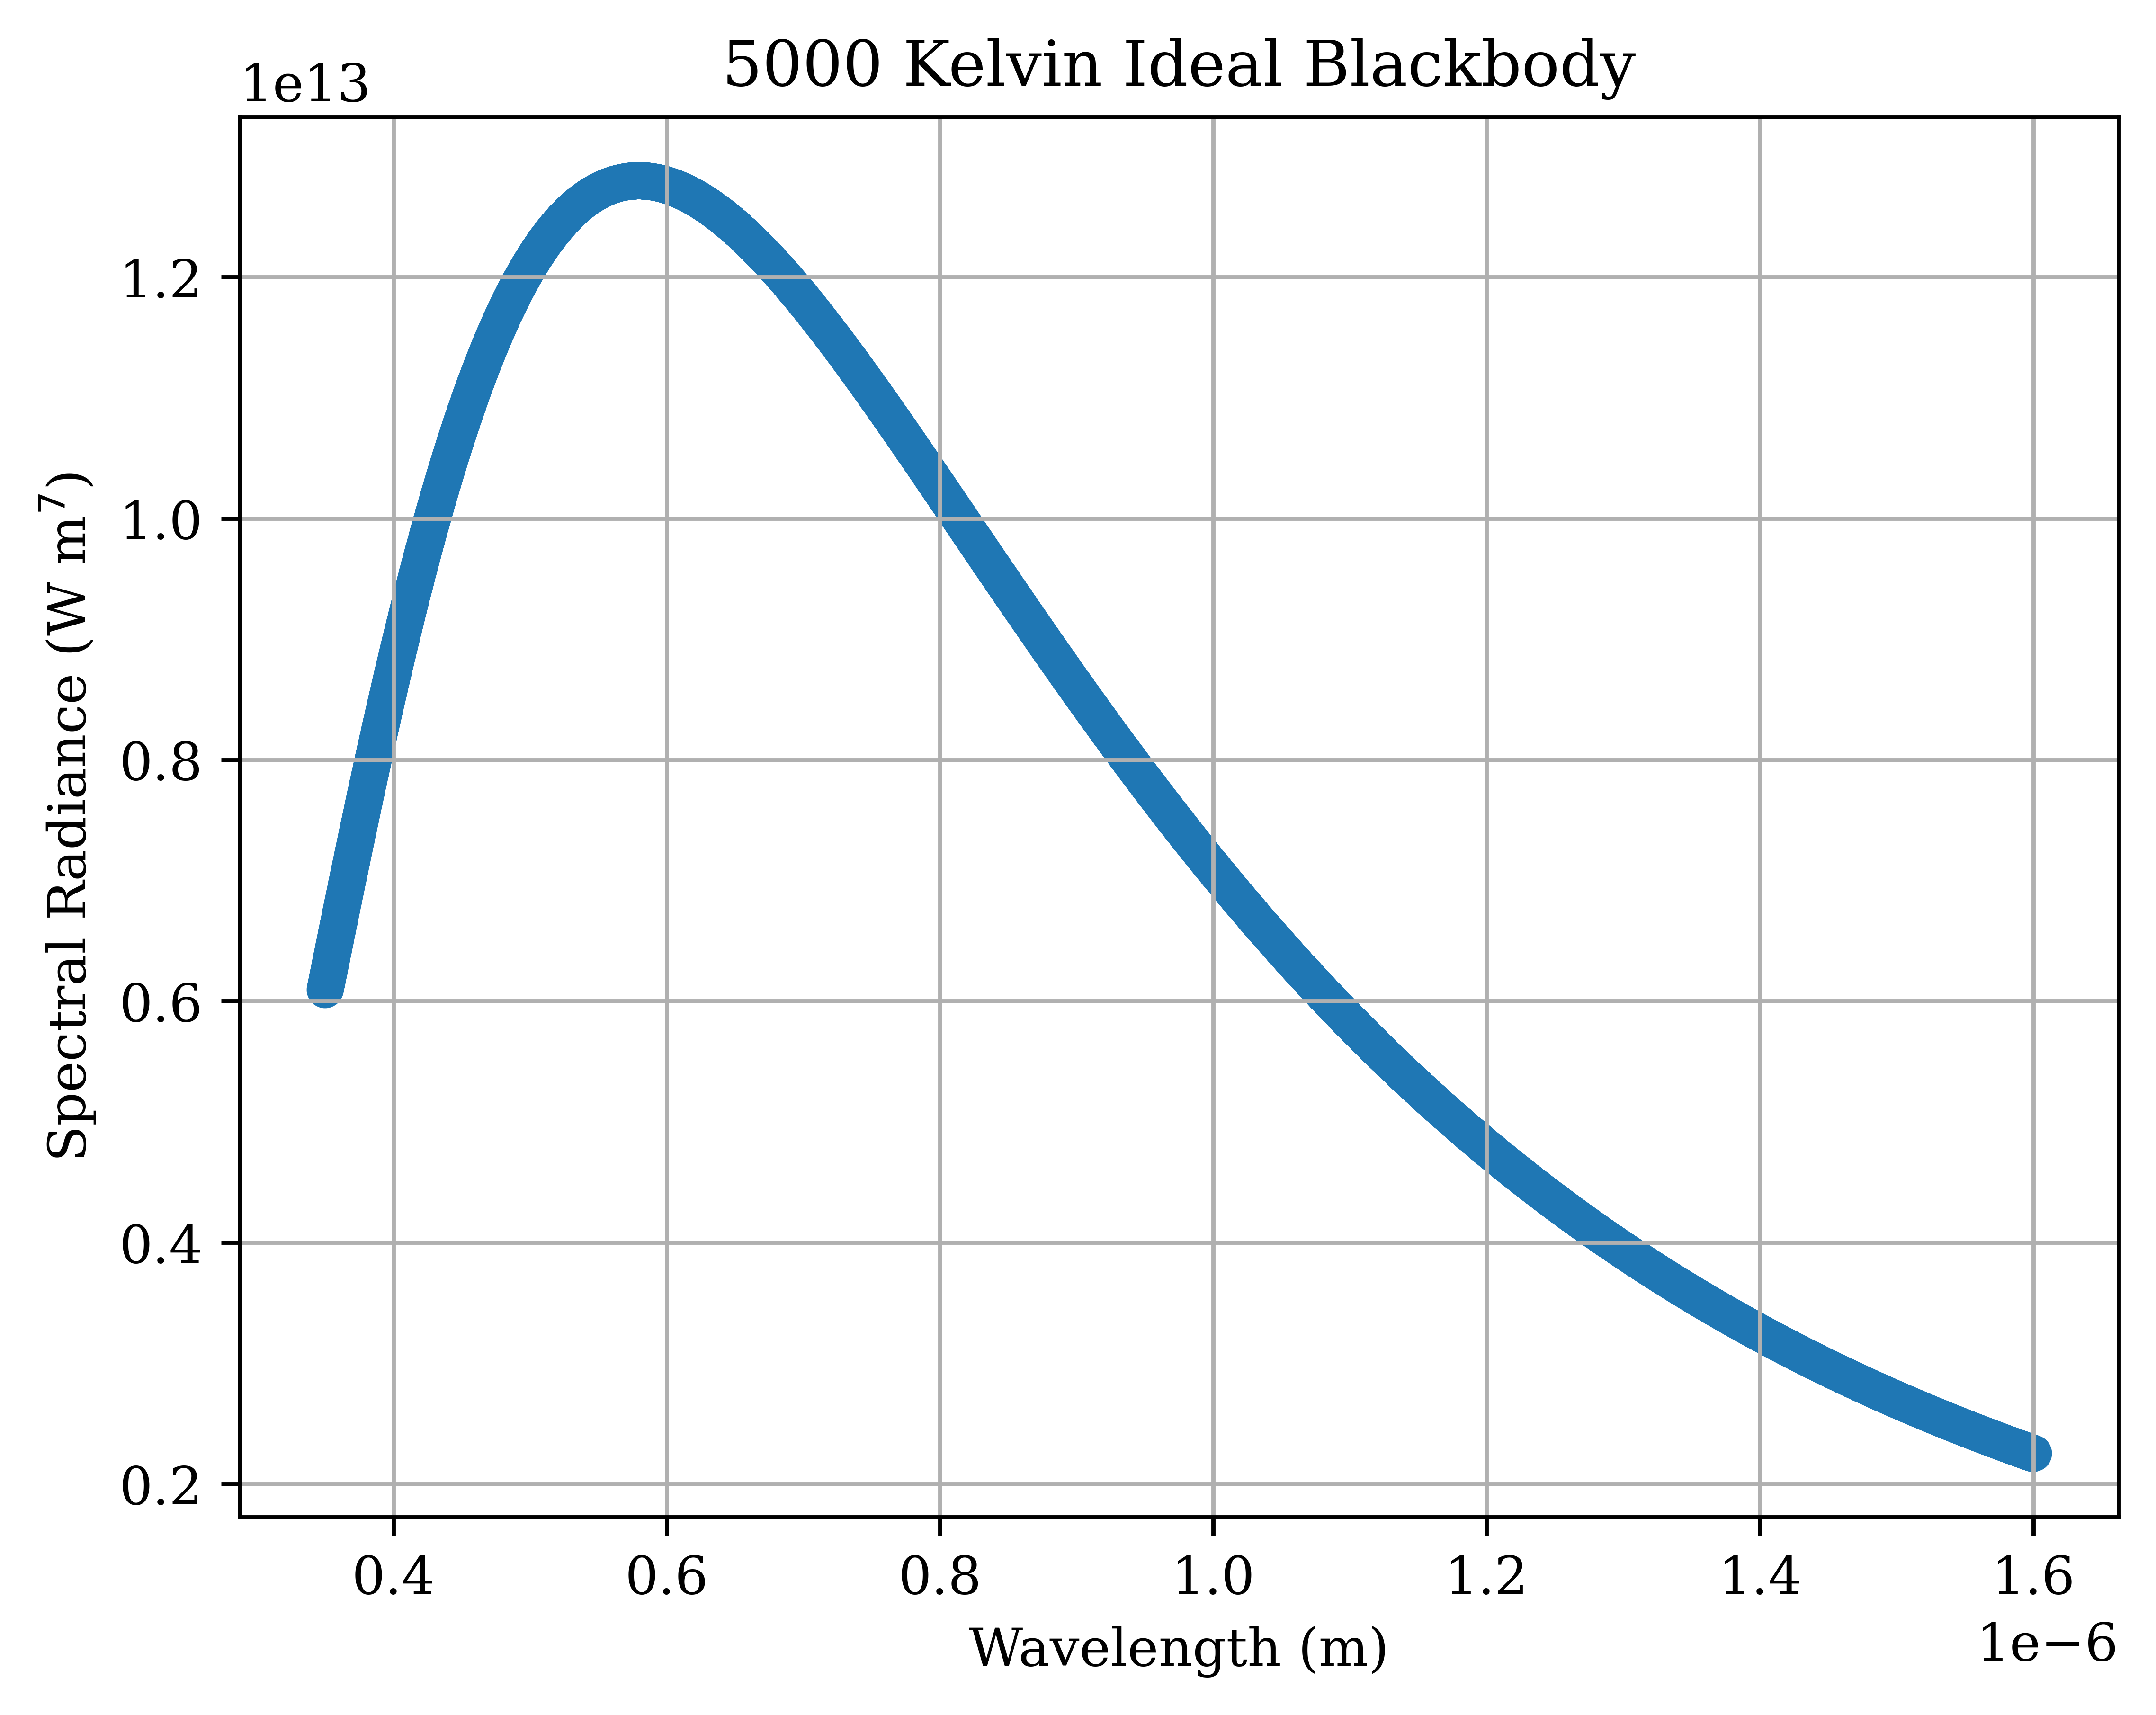

In [49]:
plot_planck(5000)

In [50]:
temp_list = [300, 1000, 3000, 5000]
for T in temp_list:
    peak = (3 * units.mm / T).to(units.m).value
    print(mpmath.log10(peak), mpmath.log10(B(T, peak, True)))

-4.9999999999999999644733850823019973008295631257525 6.9966882141895989645722399253954580798492679388032
-5.5228787452803375517024728445662672420376910518749 9.6110819405912867844828264505402906645595175335715
-6.0000000000000000196526453297206160616919506824173 11.996688214189598991012471950505107435953501706169
-6.2218487496163563871438785317410077257236319367645 13.105931962271380997978112262445828659487855551813


\section{Aprill 11, 2023}
Recording data here to be printed out later and turned in with the report. 

\underline{Lecture Notes}
Notebook management and safety! Lab 1: as expected from the materials, carefully measure the output from a blackbody with a photodiode. 211 is bad luck for projecting. 8 Labs/exercises total which will be in Room B129 after a short lecture in 211. Emphasis on good notebook practice. Final lab notebook due at the end of the course. 10% grade on intro lecture, 50% based on notebook and reports. 40% based on the lab itself. Data can be shared within the group but the write-up must be your own. Must be clear and coherent, but not necessarily polished. You can email Emily the TA via email on Mondays at 5PM. 

\subsection{Notebook Guidelines}
Introduction,
Equipment (e.g. spacing and the distance of the collimated lens and filter from the photodiode), Measurements (incorporating data error where appropriate), Data Analysis (including any plots!!! today we're measuring the spectral properties of a quartz lamp), Interpretation and Discussion (why did it all go wrong? Understand why the measurements did or did not agree with expectation), Summary and Conclusion (map back to introduction! we set up this halogen lamp and the photodiode, and it did or did not match expectation for these reasons). 

This week we're using a quartz lamp, a set of filters, and will measure the photoinsity of the lamp with a photodiode as a function of wavelength to determine if it's a blackbody spectrum. Describe what equipment was set up and why, sketch the layout, and don't just transcribe the lab handout. Record what you actually used in the lab environment. The interference filter assumes light in collimated space! Use a scale of the operation of the optics and why. Christoff Bernick works on optical instrumentation in Hawaii. Indicate uncertainty measurements whenever possible and reasonable!! Check your measured values against expectations! Describe any problems that occured (you won't get penalized for these specifically)! Don't erase anything (you might have been right the first time!). Show tables and plots where appropriate. Here, the photointensity will be a function of wavelength and angle. Pay attention to significant figures when appropriate. You should be spending no more than 3-4 hours writing up the report. Include the code written to plot things, and any information that helped determine the signal to noise can be included.  What do your results mean? Are they consistent with your explanation, and why or why not? This will be the bulk of the report. How could the lab be improved? What did you learn? Interpretation and discussion is to be done at home. Summarize your results rather than your expectation. 

Record everything you do! Overhead for thoroughness is always worth it. It makes the process of decoding what you've done that much easier. It must be easily reproducible by someone less experienced who has not done it yet. Be complete, clear, and organized. Each person turns in their own complete data lab notebook. Discussion in the lab is perfectly fine. The person recording data can photocopy it and share. 

Today we are focused on optical alignment in 3 dimensions and how to work on an optical table. Hopefully the lamp gives you a collimated beam that goes through the optical filter. Put back everything exactly where you found it. Dimitri redid the course and modernized it while replacing all of the equipment. Keep it that way. 

Don't touch the optics and wear gloves. 

Will rotate the filters and write the measured number of photons coming through the filter of the photodiode. Need to know the stability of the lamp, are you on axis, how large is the iris, what shape is the filter? (it will have some shape characteristic of its materials). All of the materials and will be neatly outlined. Some of the equipment is on the bench and some of it is elsewhere in the lab. Set up your lamp first and follow the outline in the handout for the rest of the equipment, one at a time. 

Will work in two groups in two benches. The groups can change. Lens maker's equations! Plot power as a function of distance two. Will send materials just in case. 

Lab notes:
\begin{itemize}
\item 2:40 PM- mounted the translational stage (xyz) onto the table with the z stage facing towards the quartz lamp. It is not yet screwed in but appears to be centered by the hole. The iris has been firmly mounted in place, and so has the lamp. The lamp and iris appear vertically aligned. See slide 1 in the slideshow (https://docs.google.com/presentation/d/1V9HHvC10PpjYFTfDer1Gq4PeY7kGloljpdjYYd0YHjA/edit#slide=id.p) We will use a paper test to perfect the alignment. Our intent is to only take measurements at the peak power (as a function of distance, orientation, but we mostly care about wavelength) such that we have an absolute reference and do not need to repeat the entire experiment should something go awry. Will be using the filters and the lenses in the rotating ring to align and mount. 
\item Nevermind we do have something to mount the lens so it won't go on the wheel, but we will put it on the wheel regardless. 
\item just mounted the xyz stage after a paper test that Tanmay took a picture of (see the fringes on slide 2). Riley and Jonah are now screwing in and further aligning the lens with the optical train (slide 3). Now aligning the optical train immediately after. I mounted photodiode to the optical train.
Carlos is inserting the filters into the filter wheel. Tanmay is going between tasks for thorough collaboration. 
\item Remounting the lamp to align in the z direction. Tanmay did in fact use a washer. Decreased the size of the iris to confirm alignment (see small iris, high on the power meter we just connected) in slide 5 and how it's lower on slide 6 with it off
\item AMBIENT LIGHT WILL HAVE A SPECTRUM FROM THE LAMP. DO READINGS WITH THE LIGHT OFF TOO. -1.76 nA with the cap on. -2.5 nA now with the cap on. Subtract the errors in quadrature. now at -3.4 nA with the cap off (I think the cap is just cooling down). Click $\Delta$ to zero the power meter. 
\item 3:26 PM. Now closing and about to 0 it. Just zeroed it. Now it's at .4 nA a few seconds after zeroing. The instrument uncertainty is in the datasheet. 
\item Measuring from the middle of the lens, we are 2 cm further than we should be. Will now translate the detector to put it in the focal point. 
\item 3:29 PM. Now moving the iris vertically. Appeared to have been unaligned before. 
\item Add the noise in quadrature. Don't force anything. Nothing here should require more force than a few fingers or move quickly or crash and bang. Due to chromatic aberration, each filter will have a different focus point. 
\item Varies by approximatly 70 nA from open to maximally closed iris. Will use a consistent aperture for each measurement. 
\item Each filter increases from 2-6 increasing in wavelength. Number 2 is 350 nm, number 3 is 400 nm, number 4 is 450 nm. They increase by 50 nm each. The last one is 600 nm (currently in the wheel). 
\item Currently 27 cm from the lens.
\item 3:41 PM. Tanmay aligned the iris. 
\item 3:46 PM. zeroing with the ambient light.
\item 350 nm: just zeroed and moved the photodiode forward again. Now at 126 nA. There is less 1/r squared dependence when it is collimated.  


\end{itemize}

The function make_data_array picks a subset of the given CSV file to use for data analysis and plotting. 

The function make_numeric returns a plottable version a given dataframe. 

In [64]:
def make_data_array(all_data, cols, rows):
    sub_array = all_data.iloc[rows[0]+1:rows[1]+1,cols[0]:cols[1]]
    sub_array.columns = [x for x in all_data.iloc[rows[0],cols[0]:cols[1]]]
    return sub_array.set_index(sub_array.columns[0])
def make_numeric(data):
    rows, cols = data.shape
    for row in range(1,rows):
        for col in range(cols):
            try: 
                data.iloc[row, col] = float(data.iloc[row, col])
            except:
                if type(data.iloc[row, col]) is str: 
                    test = data.iloc[row, col].split(" ")[0]
                    if (test.isnumeric() or test[-1].isnumeric()):
                        data.iloc[row, col] = float(test)
    rownames = [x for x in data.index]
    for row, rowname in enumerate(rownames):
        test = rownames[row]
        if type(rowname) is str: 
                try:
                    rownames[row] = float(test.split(" ")[0])
                except:
                    if (test.isnumeric() or test[-1].isnumeric()):
                        rownames[row] = float(test)
    data["Indices"] = np.int64(rownames)
    index_name = data.index.name
    data.set_index("Indices", drop=True, inplace=True)
    data.index.name = index_name
    for col in data.columns:
        data[col] = np.float64(data[col].to_numpy())
    return data
all_data = pd.read_csv("week1_data.csv")

In [78]:
cols = (1,-2)
rows = (5,15)
IR_data_numeric = make_numeric(make_data_array(all_data, cols, rows))
IR_data_numeric

,last decimal Max Current (± l.d. μA),Trial 2,Trial 3
λ (±10 nm),,,
850,0.469,0.462,0.465
900,0.610,0.612,0.635
1000,0.761,0.810,0.829
1100,0.701,0.687,0.682
1200,1.189,1.165,1.160
1300,2.142,2.140,2.086
1400,2.363,2.374,2.293
1500,6.940,6.940,6.930
1550,10.190,10.140,10.230


In [79]:
df = np.log(IR_data_numeric)
fig = go.Figure()
for col in range(df.shape[1]):
    fig.add_trace(go.Scatter(x=df.index.to_numpy(),
                y=df.iloc[:,col].to_numpy(), name=df.columns[col]))
#fig.add_scatter("last decimal Max Current (± l.d. μA)")
fig.update_layout(title="Raw Infrared Data Collected from Photodiode and Power Meter",
    yaxis_title="Natural log of μA Recorded", 
    xaxis_title="Wavelength of Filter in Optical Train (±10 nm)")
fig.update_yaxes(minor=dict(ticks="inside", ticklen=50, showgrid=True))
#fig.update_yaxes(type="log")
fig.update_xaxes(minor=dict(ticks="inside", ticklen=50, showgrid=True))
fig.write_html("collected_IR_data_numerical.html")
fig

In the above plot, l.d. means last decimal and that the uncertainty is $\pm1$ in the last decimal place of each datum.

In [80]:
T = 2800
wavelengths = [int(x) for x in IR_data_numeric.index]
radiances = [float(B(T, l, True)) for l in wavelengths]
wavelengths

[850, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1550, 1600]

Based on the above plot, there are not any systematic biases in the different trials of the raw infrared data. Thus the current from each measured wavelength will be averaged.

In [81]:
IR_data_numeric["Average"] = [np.average(IR_data_numeric.iloc[lam,:-1])
                              for lam in range(IR_data_numeric.shape[0])]
IR_data_numeric

,last decimal Max Current (± l.d. μA),Trial 2,Trial 3,Average
λ (±10 nm),,,,
850,0.469,0.462,0.465,0.4655
900,0.610,0.612,0.635,0.6110
1000,0.761,0.810,0.829,0.7855
1100,0.701,0.687,0.682,0.6940
1200,1.189,1.165,1.160,1.1770
1300,2.142,2.140,2.086,2.1410
1400,2.363,2.374,2.293,2.3685
1500,6.940,6.940,6.930,6.9400
1550,10.190,10.140,10.230,10.1650


In [82]:
photodiode_specs_lams = pd.read_csv("photodiode_specs.csv")
photodiode_specs_lams

,Wavelength (nm),Responsivity (A/W),Uncertainty (A/W)
0,750.6210,0.0033,0.000165
1,800.0509,0.0043,0.000215
2,852.3864,0.0051,0.000255
3,898.8994,0.0052,0.000260
4,949.7673,0.0049,0.000245
5,999.1859,0.0049,0.000245
6,1050.0608,0.0051,0.000255
7,1100.2175,0.0060,0.000300
8,1149.6544,0.0075,0.000375
9,1202.0125,0.0102,0.000510


Now to implement a weighted average to calibrate the data in order to convert the measurements from amps to watts. It essentially uses a linear approximation for the response function between the power and watts of the a given photodiode. First we use the IR photodiode, the S120C Si photodiode. A professional project would likely use a spline fit to very precisely approximate the response of the photodiode in amps from incident light at a given wavelength in watts.

In [96]:
def get_corresponding_data(lam, df, lim = 2):
    row = 0
    while not (df.iloc[row, 0] > lam):
        row += 1
        if row > df.shape[0] - 1:
            return df.iloc[row-1, :] 
    if row > 0 and row < df.shape[0]-1 and df.iloc[row-1, 0] - lim < lam:
        dist = df.iloc[row, 0] - df.iloc[row-1, 0]
        return (df.iloc[row-1,:] * (df.iloc[row,0] - lam) + 
             df.iloc[row,:] * (lam - df.iloc[row-1,0])) / dist
    return df.iloc[row, :]
corresponding_data = [get_corresponding_data(lam,
                    photodiode_specs_lams) for lam in wavelengths]
calibrating_df = pd.DataFrame(corresponding_data)#.reset_index(inplace=True)
calibrating_df.reset_index(inplace=True, drop=True)
lam_name = "Wavelength (nm)"
calibrating_df[lam_name] = [int(np.round(x)) for x in calibrating_df[lam_name]]
calibrating_df.set_index(lam_name, inplace=True, drop=False)
calibrating_df

,Wavelength (nm),Responsivity (A/W),Uncertainty (A/W)
Wavelength (nm),,,
850,850,0.005064,0.000253
900,900,0.005194,0.000260
1000,1000,0.004903,0.000245
1100,1100,0.005996,0.000300
1200,1200,0.010096,0.000505
1300,1300,0.019329,0.000966
1400,1400,0.037448,0.001872
1500,1500,0.061494,0.003075
1550,1550,0.071450,0.003572


Now we use the weighted we already calculated for the responsivity to convert the average current to the average incident power on the photodiode. 

In [98]:
IR_data_numeric["Average μWatts"] = calibrating_df.loc[
    :,"Responsivity (A/W)"] *  IR_data_numeric.loc[:, "Average"]
IR_data_numeric

,last decimal Max Current (± l.d. μA),Trial 2,Trial 3,Average,Average μWatts
λ (±10 nm),,,,,
850,0.469,0.462,0.465,0.4655,0.002357
900,0.610,0.612,0.635,0.6110,0.003173
1000,0.761,0.810,0.829,0.7855,0.003851
1100,0.701,0.687,0.682,0.6940,0.004161
1200,1.189,1.165,1.160,1.1770,0.011883
1300,2.142,2.140,2.086,2.1410,0.041383
1400,2.363,2.374,2.293,2.3685,0.088695
1500,6.940,6.940,6.930,6.9400,0.426770
1550,10.190,10.140,10.230,10.1650,0.726287


In [99]:
df = np.log(IR_data_numeric)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index.to_numpy(),
                y=df.iloc[:,-1].to_numpy(), name=df.columns[col]))
#fig.add_scatter("last decimal Max Current (± l.d. μA)")
fig.update_layout(title="Calibrated Data Collected from Photodiode and Power Meter",
    yaxis_title="Natural log of Average μWatts of Incident Light", 
    xaxis_title="Wavelength of Filter in Optical Train (±10 nm)")
fig.update_yaxes(minor=dict(ticks="inside", ticklen=50, showgrid=True))
#fig.update_yaxes(type="log")
fig.update_xaxes(minor=dict(ticks="inside", ticklen=50, showgrid=True))
fig.write_html("collected_IR_data_numerical.html")
fig

In [229]:
px.scatter(calibrating_df)

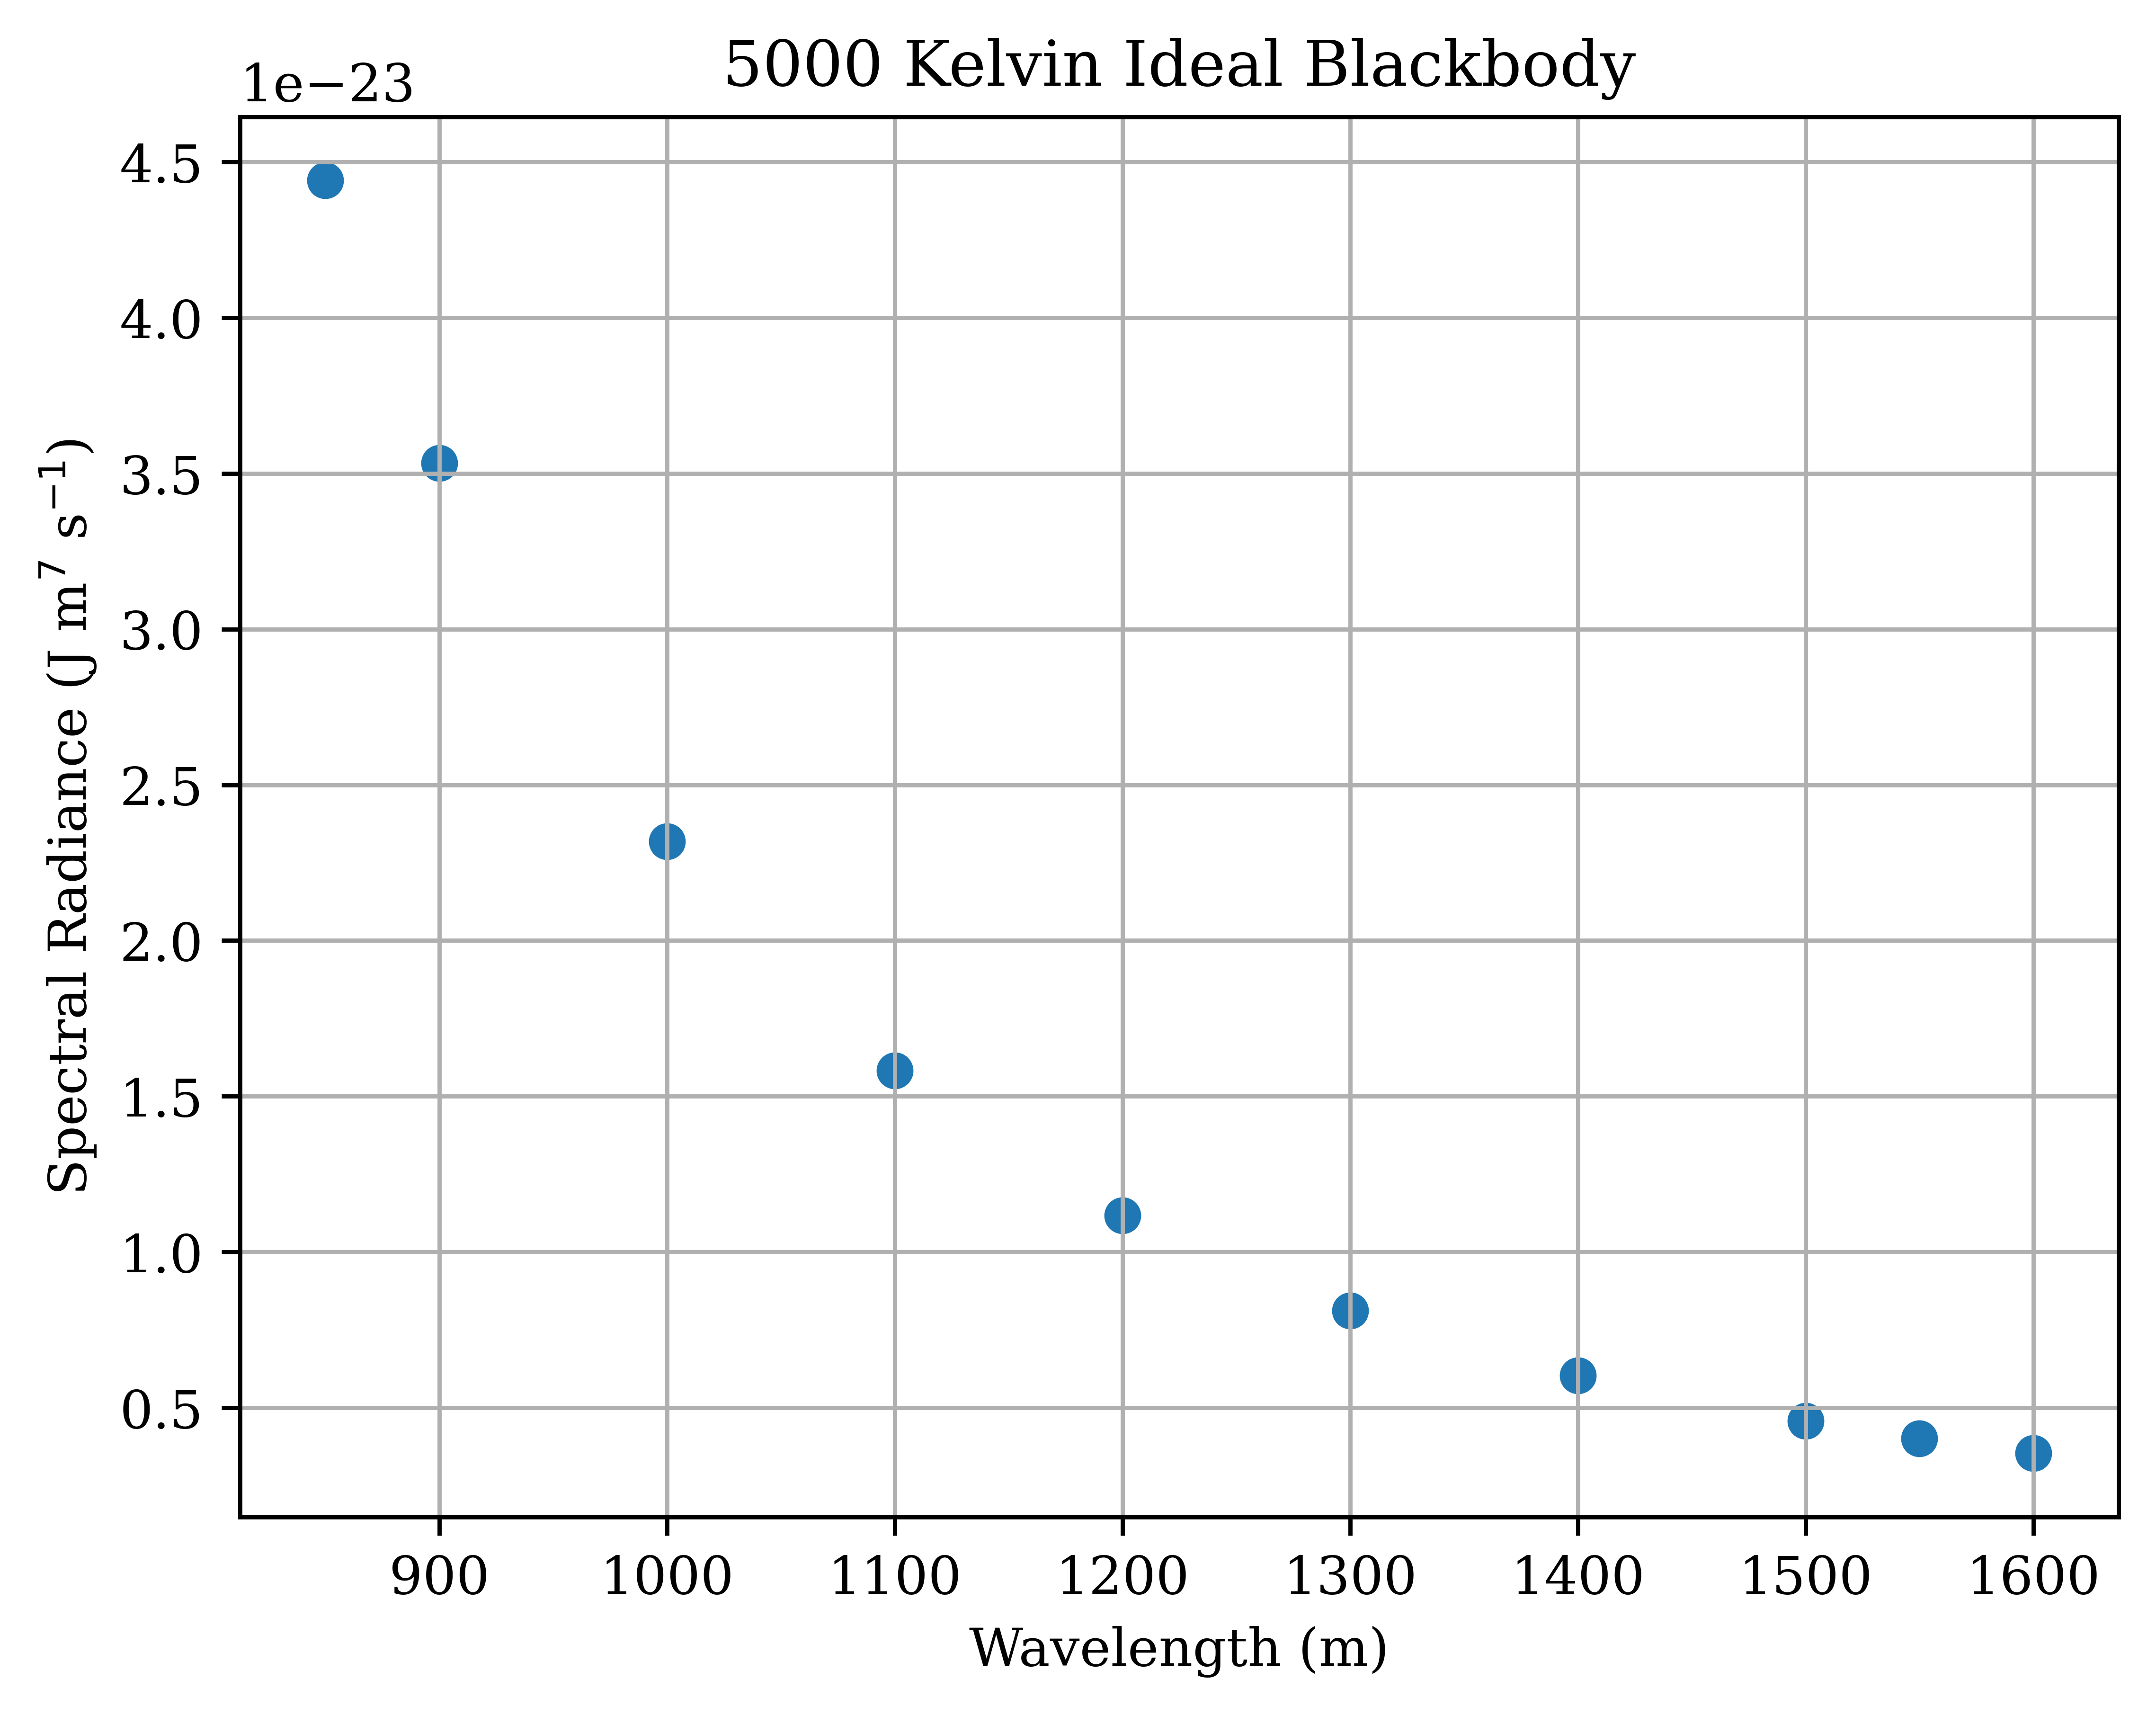

In [132]:
df = pandas.DataFrame([wavelengths, radiances]).transpose()
df.columns = ["Wavelength (m)", yname]
fig = px.scatter(df, x="Wavelength (m)", y = yname, 
            title = "Planck Function for " + 
                 str(T) + " Kelvin Ideal Blackbody")
fig.write_html(str(T) + "blackbody_plot.html")
plt.figure(dpi = 800)
plt.scatter(wavelengths, radiances)
plt.xlabel("Wavelength (m)")
plt.grid(which='minor', axis='both', visible=True)
plt.grid(which='major', axis='both', visible=True)
plt.ylabel("Spectral Radiance (J m$^{7}$ s$^{-1}$)") 
plt.title(str(T) + " Kelvin Ideal Blackbody")
plt.show()

In [ ]:
def plot_planck(T):
    wavelengths = np.linspace(350 * 10**-9, 1600 * 10**-9, 10**4)
    radiances = [float(B(T, l, True)) for l in wavelengths]
    yname =  "Spectral Radiance (W/(Hz sr m m))"
    df = pandas.DataFrame([wavelengths, radiances]).transpose()
    df.columns = ["Wavelength (m)", yname]
    fig = px.scatter(df, x="Wavelength (m)", y = yname, 
                      title = "Planck Function for " + str(T) + " Kelvin Ideal Blackbody")
    fig.write_html(str(T) + "blackbody_plot.html")
    plt.figure(dpi = 800)
    plt.scatter(wavelengths, radiances)
    plt.xlabel("Wavelength (m)")
    plt.grid(which='minor', axis='both', visible=True)
    plt.grid(which='major', axis='both', visible=True)
    plt.ylabel("Spectral Radiance (W Hz$^{-1}$ sr$^{-1}$ m$^2$)") 
    plt.title(str(T) + " Kelvin Ideal Blackbody")
    return plt

In [26]:
cols = (1,-2)
rows = (38,42)
visible_data = make_data_array(all_data, cols, rows)
visible_data

,Max Current (± last decimal μA),Trial 2,Trial 3
λ (±10 nm),,,
400,0.145,0.148,0.145
550,1.768,1.79,1.779
650,3.410 ±0.003,3.44,3.442
750,5.189,5.226,5.231


In [27]:
cols = (1,-2)
rows = (38,42)
visible_data_numeric = make_numeric(make_data_array(all_data, cols, rows))
visible_data_numeric

,Max Current (± last decimal μA),Trial 2,Trial 3
λ (±10 nm),,,
400,0.145,0.148,0.145
550,1.768,1.79,1.779
650,3.410,3.44,3.442
750,5.189,5.226,5.231


In [46]:
cols = (1,-2)
rows = (45,56)
angular_data_numeric = make_numeric(make_data_array(all_data, cols, rows))
angular_data_numeric

,Current (± last decimal μA),Trial 2,Trial 3
Angle (degrees),,,
-60,0.65,0.66,0.68
-45,2.12,2.03,2.03
-30,3.72,3.72,3.73
-15,5.05,5.07,5.11
0,5.74,5.77,5.76
15,5.41,5.37,5.31
30,4.32,4.34,4.26
45,2.48,2.51,2.59
60,0.96,0.99,0.96


In [63]:
latp(const.h.unit * units.m * const.c.unit**2)

'\\mathtt{\\text{J m3 / s}}'

In [29]:
!jupyter nbconvert --to latex Lab1.ipynb

[NbConvertApp] Converting notebook Lab1.ipynb to latex
[NbConvertApp] Support files will be in Lab1_files\
[NbConvertApp] Making directory Lab1_files
[NbConvertApp] Writing 47723 bytes to Lab1.tex
